# setup

In [1]:
import sys, os
from datetime import datetime
import sqlite3

# import sqlalchemy
import pyexasol
import pandas as pd
import numpy as np

from credentials import Credentials
from helper import SimulateID, analyze_sim_kpi
import config

In [2]:
assert os.getcwd().rsplit("/", 1)[-1] == '_create'

In [3]:
sys.path.append("./sql")
import sql.broadcast, sql.target_group, sql.cdm, sql.broadcast_target_group_cdm

In [4]:
print(sql.broadcast_target_group_cdm.query)


SELECT
    -- ## broadcast
    aus.run_key,  -- need to transform this
    titel,
    sender,
    startzeit_ts,
    endezeit_ts,
    startzeit_ts_dr,
    endezeit_ts_dr,
    wochentag,
    dauer,  -- in seconds (?)
    titelid, -- need to tranform this!
    genre_1,
    genre_2,
    genre_3,
    WIEDERHOLUNG -- ?
    ,

    -- ## target group
    zg.zielgruppe,
    zg.sehb,
    zg.tvg
    -- zg.sehd
    ,

    g2c.ID_PROMAMS,

    -- ## cdm
      -- ## ausstrahlungs-ebene
    cdm.A_ID, -- Eindeutige Nummer (Primärschlüssel) der Datenbank AnalyticsCube. Die Ausstrahlung ist die unterste für uns relevante Ebene einer in ProMams angelegten Plan- bzw. Ist-Lizenz oder eines Plan- bzw. Ist-Contents. Beispielsweise ist es im Falle eines Spielfilms ein Run/Ausstrahlung des Films selbst, bei einer Serie ist es ein Run/Ausstrahlung der Episode.
    cdm.A_BESTSELLER_WIEVIELTE, -- A_INTERNAL_REPETITION_NUMBER Dieses Feld zählt die interne chronologische Ausstrahlungsreihenfolge der Content-ID inn

In [5]:
credentials = Credentials(path="/mnt/c/Users/spa0001f/.hasselhoff")

In [6]:
not_connected = True
count = 0
while not_connected:
    try:
        connection = pyexasol.connect(dsn=credentials.exasol.dsn,
                             user=credentials.exasol.write.user,
                             password=credentials.exasol.write.key, compression=True)
    except:
        count = count + 1
        print(f"connection attempt {count} to exasol was not succesful")
    else:
        print("connected to exasol")
        not_connected = False

connected to exasol


In [7]:
# df = connection.export_to_pandas("SELECT DISTINCT sender FROM bids_universe_source_gfk.ausstrahlungen")

In [8]:
# full_.columns()

# directly export to pandas -> full
- not advise because I get pandas warning of mixed types, the reason is that pyexsol.connect().export_to_pandas exports to a csv and then uses pd.read_csv -> update: it works now

In [9]:
print(sql.broadcast_target_group_cdm.query)


SELECT
    -- ## broadcast
    aus.run_key,  -- need to transform this
    titel,
    sender,
    startzeit_ts,
    endezeit_ts,
    startzeit_ts_dr,
    endezeit_ts_dr,
    wochentag,
    dauer,  -- in seconds (?)
    titelid, -- need to tranform this!
    genre_1,
    genre_2,
    genre_3,
    WIEDERHOLUNG -- ?
    ,

    -- ## target group
    zg.zielgruppe,
    zg.sehb,
    zg.tvg
    -- zg.sehd
    ,

    g2c.ID_PROMAMS,

    -- ## cdm
      -- ## ausstrahlungs-ebene
    cdm.A_ID, -- Eindeutige Nummer (Primärschlüssel) der Datenbank AnalyticsCube. Die Ausstrahlung ist die unterste für uns relevante Ebene einer in ProMams angelegten Plan- bzw. Ist-Lizenz oder eines Plan- bzw. Ist-Contents. Beispielsweise ist es im Falle eines Spielfilms ein Run/Ausstrahlung des Films selbst, bei einer Serie ist es ein Run/Ausstrahlung der Episode.
    cdm.A_BESTSELLER_WIEVIELTE, -- A_INTERNAL_REPETITION_NUMBER Dieses Feld zählt die interne chronologische Ausstrahlungsreihenfolge der Content-ID inn

In [10]:
connection.execute(sql.cdm.query).columns()

{'A_ID': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'A_BESTSELLER_WIEVIELTE': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'A_CONTENTAUSSTRAHLUNG_WIEVIELTE_FREE_TV': {'type': 'DECIMAL',
  'precision': 18,
  'scale': 0},
 'C_ID': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'C_CONTENT': {'type': 'VARCHAR', 'size': 500, 'characterSet': 'UTF8'},
 'C_ORIGINALTITEL': {'type': 'VARCHAR', 'size': 500, 'characterSet': 'UTF8'},
 'C_AUFLISTREIHENF': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'C_SERIE': {'type': 'VARCHAR', 'size': 500, 'characterSet': 'UTF8'},
 'C_SERIE_ID': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'C_PRODUKTIONSSTAFFEL_STAFFEL_NR': {'type': 'DECIMAL',
  'precision': 18,
  'scale': 0},
 'C_PRODJAHR_VON': {'type': 'DECIMAL', 'precision': 18, 'scale': 0},
 'C_SERIE_KATEGORIE': {'type': 'VARCHAR', 'size': 100, 'characterSet': 'UTF8'},
 'C_ERSTESPRODUKTIONSLAND': {'type': 'VARCHAR',
  'size': 100,
  'characterSet': 'UTF8'},
 'C_SERIE_VERWENDBARKE

In [11]:
full = connection.export_to_pandas(sql.broadcast_target_group_cdm.query)

In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828805 entries, 0 to 4828804
Data columns (total 41 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   RUN_KEY                          object 
 1   TITEL                            object 
 2   SENDER                           object 
 3   STARTZEIT_TS                     object 
 4   ENDEZEIT_TS                      object 
 5   STARTZEIT_TS_DR                  object 
 6   ENDEZEIT_TS_DR                   object 
 7   WOCHENTAG                        object 
 8   DAUER                            int64  
 9   TITELID                          int64  
 10  GENRE_1                          object 
 11  GENRE_2                          object 
 12  GENRE_3                          object 
 13  WIEDERHOLUNG                     object 
 14  ZIELGRUPPE                       object 
 15  SEHB                             float64
 16  TVG                              float64
 17  ID_PROMA

## lower case columns -> oder sollen das die studenten machen? sie sollen dann ein mapping erstellen, die spalte an dieser stelle nicht verändern sondern konsistent mit quelle lassen

## compute market share

In [13]:
full = full.assign(MARKET_SHARE = lambda x: (x['SEHB'] / x['TVG']) * 100)

## new keys: full -> df: INPUT REQUIRED
- run_id
- title_id
- a_id
- c_id
- l_id

In [14]:
if False:
    import importlib
    import helper
    importlib.reload(helper)
    from helper import SimulateID, analyze_sim_kpi

In [15]:
simulate_id = (
    SimulateID(full)
    .assign_sim_id('RUN_KEY', 100000)
    .assign_sim_id('TITELID', 30000)
    .assign_sim_id('A_ID', 5000)
    .assign_sim_id('C_ID', 7000)
    .assign_sim_id('C_SERIE_ID', 4000)
    # .assign_sim_id('L_ID', 3000)
)

In [16]:
df = simulate_id.df

In [17]:
df.columns

Index(['RUN_KEY', 'TITEL', 'SENDER', 'STARTZEIT_TS', 'ENDEZEIT_TS',
       'STARTZEIT_TS_DR', 'ENDEZEIT_TS_DR', 'WOCHENTAG', 'DAUER', 'TITELID',
       'GENRE_1', 'GENRE_2', 'GENRE_3', 'WIEDERHOLUNG', 'ZIELGRUPPE', 'SEHB',
       'TVG', 'ID_PROMAMS', 'A_ID', 'A_BESTSELLER_WIEVIELTE', 'C_ID',
       'C_CONTENT', 'C_SERIE_ID', 'C_SERIE', 'C_ORIGINALTITEL',
       'C_AUFLISTREIHENF', 'C_PRODUKTIONSSTAFFEL_STAFFEL_NR', 'C_PRODJAHR_VON',
       'C_SERIE_KATEGORIE', 'C_ERSTESPRODUKTIONSLAND',
       'C_SERIE_VERWENDBARKEIT', 'C_FSK', 'C_HOECHSTE_BESUCHERZAHL_D', 'L_ID',
       'A_REDAKTION_BESTOF', 'L_BEGINN', 'L_ENDE', 'L_IST_AUS', 'A_WIEVIELTE',
       'A_WIEVIELTER_RUN', 'A_WH', 'MARKET_SHARE', 'RUN_KEY_SIM',
       'TITELID_SIM', 'A_ID_SIM', 'C_ID_SIM', 'C_SERIE_ID_SIM'],
      dtype='object')

In [18]:
IDS = ['RUN_KEY', 'TITELID', 'A_ID', 'C_ID'] # , 'L_ID']

(
    df
    [IDS + [f"{k}_SIM" for k in IDS]]
    .dropna()
    .head(10))

,RUN_KEY,TITELID,A_ID,C_ID,RUN_KEY_SIM,TITELID_SIM,A_ID_SIM,C_ID_SIM
index,,,,,,,,
40,201201010304431069310559359,559359,24779377.0,511792.0,100021,33542,33347.0,10759.0
41,201201010304431069310559359,559359,24779377.0,511792.0,100021,33542,33347.0,10759.0
42,201201010304431069310559359,559359,24779377.0,511792.0,100021,33542,33347.0,10759.0
43,201201010304431069310559359,559359,24779377.0,511792.0,100021,33542,33347.0,10759.0
44,201201010304431069310559359,559359,24779377.0,511792.0,100021,33542,33347.0,10759.0
60,201201010325181069310000045,45,24779358.0,20143.0,100025,30001,33338.0,7701.0
61,201201010325181069310000045,45,24779358.0,20143.0,100025,30001,33338.0,7701.0
62,201201010325181069310000045,45,24779358.0,20143.0,100025,30001,33338.0,7701.0
63,201201010325181069310000045,45,24779358.0,20143.0,100025,30001,33338.0,7701.0


## simulate sehb, tvg, kinobesucher

### no grouping w.r.t. movies and series: obsolete (?)

In [19]:
if False:
    import numpy as np
    from numpy.random import default_rng
    rng = default_rng()

    scale = 0.25
    rnd = lambda x: rng.beta(0.5, 0.5, len(df))
    """
    a_ = rng.random(len(df)) * scale - scale / 2
    w_ = rng.random(len(df)) * scale * a_ - (scale * a_) / 2
    (w_/a_).min()

    a = 1 + a_
    w = 1 + w_
    """
    a = 1 + rnd(0) * scale - scale / 2
    w_a = 1 + rnd(0) * scale - scale / 2  #  = df['MARKET_SHARE']/df['MARKET_SHARE_SIM']
    w = a / w_a
    print(f"{(w_a).max()=}, {(w_a).min()=}")
    print(f"{w.min()=}, {w.max()=}")



In [20]:
if False:
    df['TVG_SIM'] = df['TVG'] * a
    df['SEHB_SIM'] = df['SEHB'] * w  # SEHB_SIM darf nicht größer als tvg sein, kann passieren
    cond = df['SEHB_SIM'] > df['TVG_SIM']
    df.loc[cond, 'SEHB_SIM'] = df.loc[cond, 'TVG_SIM']
    df['MARKET_SHARE_SIM'] = (df['SEHB_SIM'] / df['TVG_SIM']) * 100

In [21]:
# analyze_sim_kpi(df, 'MARKET_SHARE')

In [22]:
# analyze_sim_kpi(df, 'SEHB', round_ = 3)

In [23]:
# analyze_sim_kpi(df, 'TVG', round_ = 3)

### group w.r.t. TITELID

In [24]:
from typing import Callable
from numpy.random import default_rng

rng = default_rng()
scale = 0.25  # determines the spread of the random data around the true data
rnd = lambda n: (1 + rng.beta(0.5, 0.5, 1) * scale - scale / 2).squeeze()
multiply_sehb = 0.9  # decrease sehb sim and ma sim

def get_sim_kpis(df, rnd: Callable[int, float], scale: int = 1.74):  # rnd returns a random number
    a = rnd(1) * scale
    w_a = rnd(1)
    w = w_a * a
    
    df = df.copy() # do not mutate within apply https://pandas.pydata.org/docs/user_guide/gotchas.html#mutating-with-user-defined-function-udf-methods
    df['TVG_SIM'] = df['TVG'] * a 

    df['SEHB_SIM'] = df['SEHB'] * w  * multiply_sehb # SEHB_SIM darf nicht größer als tvg sein, kann passieren
    cond = df['SEHB_SIM'] > df['TVG_SIM']
    df.loc[cond, 'SEHB_SIM'] = df.loc[cond, 'TVG_SIM']

    df['MARKET_SHARE_SIM'] = (df['SEHB_SIM'] / df['TVG_SIM']) * 100
    df['C_HOECHSTE_BESUCHERZAHL_D_SIM'] = df['C_HOECHSTE_BESUCHERZAHL_D'] * w_a
    df['a'] = a
    df['w_a'] = w_a
    df['w'] = w
    
    return df

In [25]:
df = (
    df
    .groupby(['TITELID'])  # do not group w.r.t TARGET_GROUP here, not necessary (?)
    .apply(lambda x: get_sim_kpis(x, rnd)))

In [26]:
# df.iloc[:, -20:].head(10)

In [27]:
# df[df['TITELID'] == 1024716]['C_ID']

In [28]:
if False:
    cond_movies_and_series = df['GENRE_1'].isin(['Spielfilm', 'Serie', 'Animation'])
    movies_and_series = df[cond_movies_and_series].copy() # 37%
    other = df[~cond_movies_and_series].copy() # 63%

,SEHB,SEHB_SIM,abs_diff,rel_diff
count,4828780.000,4828780.000,4828780.000,4593914.000
mean,0.110,0.172,-0.062,-56.823
std,0.193,0.305,0.116,18.325
min,0.000,0.000,-11.006,-98.196
25%,0.016,0.025,-0.069,-65.961
50%,0.051,0.079,-0.027,-58.278
75%,0.125,0.195,-0.008,-45.584
max,15.018,25.092,0.000,-19.901


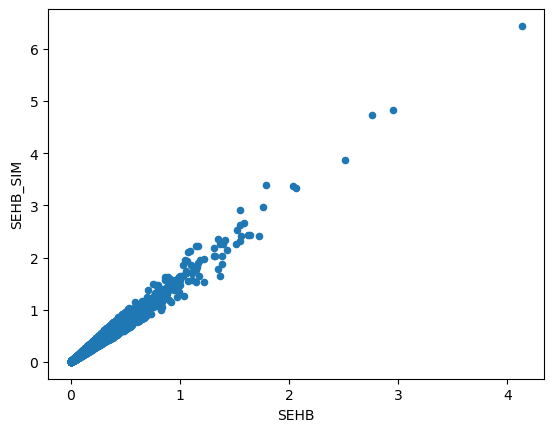

In [29]:
analyze_sim_kpi(df, 'SEHB', round_ = 3)

,TVG,TVG_SIM,abs_diff,rel_diff
count,4828780.000,4828780.000,4828780.000,4828771.000
mean,1.334,2.323,-0.988,-74.227
std,1.705,2.974,1.293,15.190
min,0.000,0.000,-15.744,-95.750
25%,0.362,0.626,-1.159,-88.747
50%,0.737,1.285,-0.544,-75.624
75%,1.562,2.719,-0.255,-58.156
max,17.170,32.331,0.000,-52.250


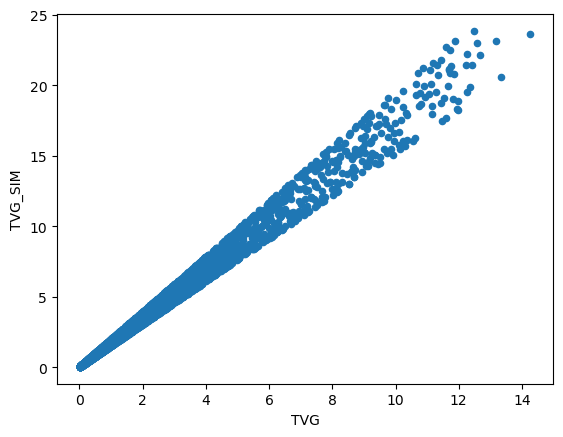

In [30]:
analyze_sim_kpi(df, 'TVG', round_ = 3)

,MARKET_SHARE,MARKET_SHARE_SIM,abs_diff,rel_diff
count,4828771.000,4828771.000,4828771.000,4593914.000
mean,8.029,7.250,0.778,9.892
std,7.262,6.632,1.065,7.773
min,0.000,0.000,-1.087,-1.250
25%,3.290,2.927,0.011,1.177
50%,6.342,5.678,0.451,10.998
75%,10.694,9.672,1.144,17.126
max,100.000,99.383,19.816,21.250


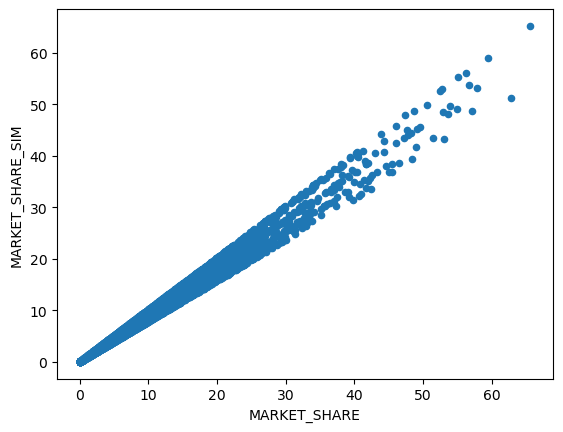

In [31]:
analyze_sim_kpi(df, 'MARKET_SHARE', round_ = 3)

,C_HOECHSTE_BESUCHERZAHL_D,C_HOECHSTE_BESUCHERZAHL_D_SIM,abs_diff,rel_diff
count,8.850500e+04,8.850500e+04,88505.000,88505.000
mean,1.422924e+06,1.427692e+06,-4768.438,0.006
std,1.979746e+06,2.010930e+06,193781.602,8.877
min,1.700000e+01,1.888700e+01,-1346346.819,-12.500
25%,2.765860e+05,2.786095e+05,-46168.063,-9.029
50%,7.194510e+05,7.176555e+05,257.763,0.216
75%,1.697128e+06,1.675906e+06,52147.678,8.815
max,1.799210e+07,1.758208e+07,1106688.691,12.500


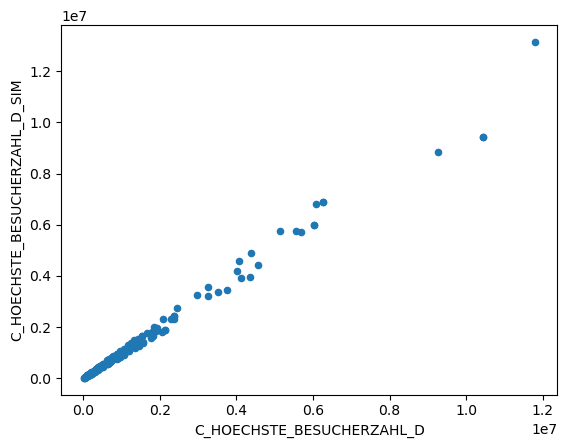

In [32]:
analyze_sim_kpi(df, 'C_HOECHSTE_BESUCHERZAHL_D', round_ = 3)

# NEW: Simulate licenses

In [33]:
# df['L_BEGINN'] = pd.to_datetime(df['L_BEGINN'])
# df['L_ENDE'] = pd.to_datetime(df['L_ENDE'])
# df['STARTZEIT_TS_DR'] = pd.to_datetime(df['STARTZEIT_TS_DR'])

## current

In [34]:
_df = df

In [35]:
max_ld_id_sim = df['L_ID'].max()
max_runs = _df['L_IST_AUS'].drop_duplicates().squeeze()
cols = ['L_ID', 'A_WIEVIELTER_RUN', 'L_BEGINN', 'L_ENDE', 'L_IST_AUS']


def first_runs(_df):
    max_runs = _df['A_WIEVIELTER_RUN'].max()
    one_run = max_runs == 1
    first_runs = _df['A_WIEVIELTER_RUN'] < max_runs
    if one_run:
        _df1 = _df.assign(L_IST_AUS_SIM = 1, L_STATUS = 'one_run')
    else:
        _df1 = (
            _df
            [first_runs]
            .assign(
                L_IST_AUS_SIM = max_runs - 1, L_STATUS = 'first_runs'))
    return _df1

def last_runs(_df):
    max_runs = _df['A_WIEVIELTER_RUN'].max()
    one_run = max_runs == 1
    last_run = _df['A_WIEVIELTER_RUN'] == _df['A_WIEVIELTER_RUN'].max()
    if one_run:
        return pd.DataFrame(columns=_df.columns)
    else:
        _df2 = _df[last_run].assign(L_IST_AUS_SIM = 1, L_STATUS = 'last_run')
        return _df2


_temp = ( # for each unique run_key get first_runs and last_runs
    _df
    .dropna(subset=['L_ID'])
    .drop_duplicates(['RUN_KEY'])  # [L_ID, A_WIEVIELTER_RUN, A_WH] statt RUN_KEY? -> eher nicht
    .sort_values(['A_WIEVIELTER_RUN']))
_grouped = _temp.groupby(['L_ID'])

_df1 = _grouped.apply(first_runs).reset_index(level=0, drop=True)  # drop index 'L_ID' so that the index is the old index
_df2 = _grouped.apply(last_runs).reset_index(level=0, drop=True)  # drop index 'L_ID' so that the index is the old index

assert _temp.shape[0] == _df1.shape[0] + _df2.shape[0]

In [36]:
# _df1

In [37]:
def transform_l_ende(col: pd.Series):
    col = col.copy()
    cond1 = col.str.startswith('9999-12-31')
    cond2 = col.isna()
    cond = cond1 | cond2
    col[~cond] = (pd.to_datetime(col[~cond]) + pd.to_timedelta(rng.integers(1, 33) + 17, unit='D')).astype(str)
    return col

# after groupby
_df1 = _df1.assign(
        # L_STATUS = 'first_runs',
        L_ID_NEW = lambda x: x['L_ID'],
        L_BEGINN_SIM = lambda x: (pd.to_datetime(x['L_BEGINN']) - pd.to_timedelta(rng.geometric(0.2, x.shape[0]) + 63, unit='D')).astype(str),  
        L_ENDE_SIM = lambda x: transform_l_ende(x['L_ENDE']),
        A_WIEVIELTER_RUN_SIM = lambda x: x['A_WIEVIELTER_RUN'])
_df2 = _df2.assign(
        # L_STATUS = 'last_run',
        L_ID_NEW = lambda x: x['L_ID'] + max_ld_id_sim, # need new ld_id_sim
        L_BEGINN_SIM = lambda x: (pd.to_datetime(x['STARTZEIT_TS_DR']) - pd.to_timedelta(rng.geometric(0.2, x.shape[0]) + 72, unit='D')).dt.floor('D').astype(str),
        L_ENDE_SIM = lambda x: (pd.to_datetime(x['STARTZEIT_TS_DR']) + pd.to_timedelta(rng.geometric(0.2, x.shape[0]) + 13, unit='D')).dt.floor('D').astype(str), # need to this this here because L_ENDE has values that are too large to be converted into a pd.Timestamp
        A_WIEVIELTER_RUN_SIM = 1)
    
_combined = pd.concat([_df1, _df2])  # drop index 'L_ID'
_index = _combined.index
# 
_out = (
    SimulateID(
        _combined.sort_values(by=['STARTZEIT_TS_DR', 'SENDER', 'ZIELGRUPPE']))
    .assign_sim_id('L_ID_NEW', 3000)
    .df
)
assert _out['L_ID_NEW_SIM'].notna().all() # important, otherwise the following merge explodes because L_ID has missings

In [38]:
license_cols2collect = [
    'L_ID_NEW', 'L_ID_NEW_SIM', 'L_STATUS', 'L_BEGINN_SIM', 'L_ENDE_SIM', 'A_WIEVIELTER_RUN_SIM', 'L_IST_AUS_SIM']
license_cols = ['RUN_KEY', 'TITEL', 'SENDER', 'ZIELGRUPPE', 'STARTZEIT_TS_DR',
    'L_ID', 'A_REDAKTION_BESTOF', 'L_BEGINN', 'L_ENDE', 'L_IST_AUS', 'A_WIEVIELTE', 'A_WIEVIELTER_RUN', 'A_WH',
]

In [39]:
_out[license_cols + license_cols2collect].head()

,RUN_KEY,TITEL,SENDER,ZIELGRUPPE,STARTZEIT_TS_DR,L_ID,A_REDAKTION_BESTOF,L_BEGINN,L_ENDE,L_IST_AUS,A_WIEVIELTE,A_WIEVIELTER_RUN,A_WH,L_ID_NEW,L_ID_NEW_SIM,L_STATUS,L_BEGINN_SIM,L_ENDE_SIM,A_WIEVIELTER_RUN_SIM,L_IST_AUS_SIM
index,,,,,,,,,,,,,,,,,,,,
40,201201010304431069310559359,Meine wilden Töchter,Kabel Eins,Erw. 14-49,2012-01-01 03:04:43.000000,637798.0,Serie,2006-09-01 00:00:00.000000,2015-01-31 00:00:00.000000,10.0,6.0,7.0,1.0,637798.0,3428,first_runs,2006-06-19,2015-02-21,7.0,8.0
60,201201010325181069310000045,BILL COSBY SHOW,Kabel Eins,Erw. 14-49,2012-01-01 03:25:18.000000,1528764.0,Serie,2010-09-01 00:00:00.000000,2014-12-31 00:00:00.000000,6.0,3.0,3.0,1.0,1528764.0,4676,first_runs,2010-06-27,2015-01-21,3.0,4.0
65,201201010349141069310000045,BILL COSBY SHOW,Kabel Eins,Erw. 14-49,2012-01-01 03:49:14.000000,1528765.0,Serie,2010-09-01 00:00:00.000000,2014-12-31 00:00:00.000000,6.0,3.0,3.0,1.0,1528765.0,4677,first_runs,2010-06-02,2015-01-21,3.0,4.0
80,201201010412591069310782322,Short Time - Nichts als Ärger mit dem Kamikaze...,Kabel Eins,Erw. 14-49,2012-01-01 04:12:59.000000,518840.0,Spielfilm,2008-01-01 00:00:00.000000,2013-12-31 00:00:00.000000,6.0,3.0,3.0,0.0,518840.0,3159,first_runs,2007-10-29,2014-01-21,3.0,4.0
145,201201010542371069310007501,CAT BALLOU - HAENGEN SOLLST DUIN WYOMING,Kabel Eins,Erw. 14-49,2012-01-01 05:42:37.000000,841599.0,Spielfilm,2008-05-01 00:00:00.000000,2012-03-30 00:00:00.000000,4.0,2.0,2.0,0.0,4095193.0,44244,last_run,2011-10-18,2012-01-15,1.0,1.0


In [40]:
if False:
    license_sim = (
         _df.dropna(subset=['L_ID'])
        .join(
            _out[license_cols2collect],
        ))
    license_sim.index.name = None
    assert license_sim.shape[0] == _df.loc[_df['L_ID'].notna()].shape[0]
    license_sim

In [41]:
if True:
    license_sim = (
     _df.dropna(subset=['L_ID'])[['RUN_KEY']].reset_index()
    .merge(
        _out[['RUN_KEY'] + license_cols2collect],
        how='left',
        on=['RUN_KEY'])
    .set_index('index'))
    license_sim.index.name = None
    assert license_sim.shape[0] == _df.loc[_df['L_ID'].notna()].shape[0]
    license_sim

In [42]:
fully_merged = df.join(
    license_sim,
    rsuffix="_")
assert fully_merged.shape[0] == df.shape[0]

In [43]:
if False:
    fully_merged = df.join(
    _out[['L_ID_NEW', 'RUN_KEY'] + license_cols2collect],
    rsuffix="_")
    assert fully_merged.shape[0] == df.shape[0]

In [44]:
_check = fully_merged.dropna(subset=['L_ID'])
pd.testing.assert_series_equal(
    _check['RUN_KEY'],
    _check['RUN_KEY_'],
    check_names=False)

In [45]:
df = fully_merged

In [46]:
if False:
    _check[license_cols + license_cols2collect].drop_duplicates('RUN_KEY')

In [47]:
if False:
    _a = _check[license_cols + license_cols2collect].drop_duplicates('RUN_KEY')
    _a[_a['L_ID'] == 2330030.0]

In [48]:
if False:
    cond = _a['A_WIEVIELTER_RUN'] > _a['L_IST_AUS']
    cond.sum() / cond.shape[0]  # knapp 5%

In [49]:
if False:
    cond = _a['A_WIEVIELTER_RUN'] != _a['A_WIEVIELTE'] 
    cond.sum() / cond.shape[0]

In [50]:
if False:
    _a.set_index('L_ID').loc[3073513.0]

In [51]:
if False:
    _a[cond][_a[cond]['L_ID'].duplicated(keep=False)].sort_values(['L_ID']).set_index('L_ID') # .loc[1654681.0]

In [52]:
if False:
    cond = _a['A_WIEVIELTE'] > _a['L_IST_AUS']
    cond.sum() / cond.shape[0]  # 0 

# save full tables as csv:df -> df_export -> table_dc

In [53]:
# df.columns

In [54]:
if False:
    mapping = {
        'RUN_KEY': 'RUN_KEY_SIM',
        'TITELID': 'TITELID_SIM',
        'C_ID': 'C_ID_SIM'
    }

In [55]:
# tables = ['broadcast', 'target_group', 'cdm', 'mapping', 'joined']
today = datetime.now().strftime("%Y_%m_%d")

In [56]:
if False:
    format_ = 'csv'
    tables = ['broadcast', 'target_group', 'cdm', 'mapping', 'joined']
    today = datetime.now().strftime("%Y_%m_%d")
    for table in tables:
        if table == 'joined':
            cols = df.columns
        elif table == 'mapping':
            cols = list(mapping.values())
        else:
            cols = list(connection.execute(getattr(sql, table).query).columns().keys())
            for k, v in mapping.items():
                if k in cols:
                    cols = cols + [v]
        path = f"./csv/{today}/{table}.{format_}"
        os.makedirs(f"./csv/{today}", exist_ok=True) 
        df.to_csv(path, columns=cols, sep=";", index=False, compression=format_)

In [57]:
if False:
    # zip
    format_ = 'zip'
    tables = ['broadcast', 'target_group', 'cdm', 'mapping_gfk_cdm', 'joined']
    today = datetime.now().strftime("%Y_%m_%d")
    for table in tables:
        if table == 'joined':
            cols = df.columns
        elif table == 'mapping':
            cols = list(mapping.values())
        else:
            cols = list(connection.execute(getattr(sql, table).query).columns().keys())
            for k, v in mapping.items():
                if k in cols:
                    cols = cols + [v]
        path = f"./csv/{today}/{table}.{format_}"
        os.makedirs(f"./csv/{today}", exist_ok=True) 
        df.to_csv(path, columns=cols, sep=";", index=False, compression=format_)

## column_mapping: INPUT REQUIRED

In [58]:
column_mapping = {
    # broadcast
    'RUN_KEY': 'RUN_ID_TRUE',
    'RUN_KEY_SIM': 'RUN_ID',
    'TITELID': 'TITLE_ID_TRUE',
    'TITELID_SIM': 'TITLE_ID',
    'TITEL': 'TITLE',
    'SENDER': 'CHANNEL',
    'STARTZEIT_TS_DR': 'START_TIME',
    'ENDEZEIT_TS_DR': 'END_TIME',
    'STARTZEIT_TS': 'START_TIME_AGF',
    'ENDEZEIT_TS': 'END_TIME_AGF',
    'WOCHENTAG': 'WEEKDAY',
    'DAUER': 'DURATION',
    'GENRE_1': 'GENRE',
    # 'GENRE_2': 'GENRE_2',
    # 'GENRE_3': 'GENRE_3',
    'WIEDERHOLUNG': 'REPETITION',
    # target_group
    'ZIELGRUPPE': 'TARGET_GROUP',
    'SEHB': 'SEHB_TRUE',
    'TVG': 'TVG_TRUE',
    'MARKET_SHARE': 'MARKET_TRUE',
    'SEHB_SIM': 'SEHB',
    'TVG_SIM': 'TVG',
    'MARKET_SHARE_SIM': 'MARKET_SHARE',
    # cdm
    'A_ID': 'A_ID_TRUE',
    'A_ID_SIM': 'A_ID',
    'A_BESTSELLER_WIEVIELTE': 'A_INTERNAL_REPETITION_NUMBER',
    'C_ID': 'C_ID_TRUE',
    'C_ID_SIM': 'C_ID',
    'C_CONTENT': 'C_CONTENT',
    'C_SERIE_ID': 'C_SERIES_ID_TRUE',
    'C_SERIE_ID_SIM': 'C_SERIES_ID',
    'C_SERIE': 'C_SERIES',
    'C_ORIGINALTITEL': 'C_ORIGINAL_TITLE',
    'C_AUFLISTREIHENF': 'C_EPISODE_NUMBER',
    'C_PRODUKTIONSSTAFFEL_STAFFEL_NR': 'C_SEASON_NUMBER',
    'C_PRODJAHR_VON': 'C_YEAR_OF_PRODUCTION',
    'C_SERIE_KATEGORIE': 'C_SERIES_CATEGORY_1',
    'C_SERIE_VERWENDBARKEIT': 'C_SERIES_CATEGORY_2',
    'C_ERSTESPRODUKTIONSLAND': 'C_COUNTRY_OF_PRODUCTION',
    'C_HOECHSTE_BESUCHERZAHL_D': 'C_HIGHEST_NUMBER_OF_VISITORS_GERMANY_TRUE',
    'C_HOECHSTE_BESUCHERZAHL_D_SIM': 'C_HIGHEST_NUMBER_OF_VISITORS_GERMANY',
    'L_ID': 'L_ID_TRUE',
    'L_BEGINN': 'L_START_TRUE',
    'L_ENDE': 'L_END_TRUE',
    'A_WIEVIELTER_RUN': 'A_WIEVIELTER_RUN_TRUE',
    'A_WIEVIELTE': 'A_WIEVIELTE',
    'A_REDAKTION_BESTOF': 'A_REDAKTION_BESTOF',
    'L_IST_AUS': 'L_IST_AUS_TRUE',
    'L_ID_NEW_SIM': 'L_ID',
    'L_BEGINN_SIM' : 'L_START',
    'L_ENDE_SIM': 'L_END',
    'A_WIEVIELTER_RUN_SIM': 'A_LICENSE_RUN',
    'L_IST_AUS_SIM': 'L_NUMBER_OF_RUNS',
    'A_WH': 'A_WH',
    #
    'a': 'WEIGHT_SEHB',
    'w': 'WEIGHT_TVG',
    'w_a': 'WEIGHT_MA'
}

In [59]:
if False:
    flat_table_columns = {}
    for k, v in column_mapping.items():
        if 'TRUE' in v:
            continue
        else:
            flat_table_columns[k] = v
    flat_table_columns

In [60]:
df_export = df.rename(columns=column_mapping)
df_export.columns

Index(['RUN_ID_TRUE', 'TITLE', 'CHANNEL', 'START_TIME_AGF', 'END_TIME_AGF',
       'START_TIME', 'END_TIME', 'WEEKDAY', 'DURATION', 'TITLE_ID_TRUE',
       'GENRE', 'GENRE_2', 'GENRE_3', 'REPETITION', 'TARGET_GROUP',
       'SEHB_TRUE', 'TVG_TRUE', 'ID_PROMAMS', 'A_ID_TRUE',
       'A_INTERNAL_REPETITION_NUMBER', 'C_ID_TRUE', 'C_CONTENT',
       'C_SERIES_ID_TRUE', 'C_SERIES', 'C_ORIGINAL_TITLE', 'C_EPISODE_NUMBER',
       'C_SEASON_NUMBER', 'C_YEAR_OF_PRODUCTION', 'C_SERIES_CATEGORY_1',
       'C_COUNTRY_OF_PRODUCTION', 'C_SERIES_CATEGORY_2', 'C_FSK',
       'C_HIGHEST_NUMBER_OF_VISITORS_GERMANY_TRUE', 'L_ID_TRUE',
       'A_REDAKTION_BESTOF', 'L_START_TRUE', 'L_END_TRUE', 'L_IST_AUS_TRUE',
       'A_WIEVIELTE', 'A_WIEVIELTER_RUN_TRUE', 'A_WH', 'MARKET_TRUE', 'RUN_ID',
       'TITLE_ID', 'A_ID', 'C_ID', 'C_SERIES_ID', 'TVG', 'SEHB',
       'MARKET_SHARE', 'C_HIGHEST_NUMBER_OF_VISITORS_GERMANY', 'WEIGHT_SEHB',
       'WEIGHT_MA', 'WEIGHT_TVG', 'RUN_KEY_', 'L_ID_NEW', 'L_ID', 'L_STATUS'

In [61]:
df_export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828805 entries, 0 to 4828804
Data columns (total 62 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   RUN_ID_TRUE                                object 
 1   TITLE                                      object 
 2   CHANNEL                                    object 
 3   START_TIME_AGF                             object 
 4   END_TIME_AGF                               object 
 5   START_TIME                                 object 
 6   END_TIME                                   object 
 7   WEEKDAY                                    object 
 8   DURATION                                   int64  
 9   TITLE_ID_TRUE                              int64  
 10  GENRE                                      object 
 11  GENRE_2                                    object 
 12  GENRE_3                                    object 
 13  REPETITION                                

In [62]:
if False:
    table = {}
    table['flat_table'] = df_export[flat_table_columns.values()]
    table['mapping_gfk_cdm'] = df[['RUN_KEY_SIM', 'A_ID_SIM']].rename(columns=column_mapping)
    table['mapping_sim'] = df_export[IDS + [f"{k}_TRUE" for k in IDS] + ['WEIGHT_SEHB', 'WEIGHT_TVG', 'WEIGHT_MA']]

    temp = list(connection.execute(getattr(sql, table).query).columns().keys())
    table['broadcast'] = df[temp + ['RUN_KEY_SIM', 'TITELID_SIM']].rename(columns=column_mapping)

    table_columns['target_group'] = list(connection.execute(getattr(sql, table).query).columns().keys())

## table_columns mapping: INPUT REQUIRED

In [63]:
table_columns = {}
table_columns['broadcast'] = ['RUN_ID', 'TITLE_ID', 'TITLE', 'CHANNEL', 'START_TIME', 'END_TIME',
                              'START_TIME_AGF', 'END_TIME_AGF',
       'WEEKDAY', 'DURATION', 'GENRE', 
                              # 'GENRE_2', 'GENRE_3', 
                              'REPETITION']
table_columns['target_group'] = ['RUN_ID'] + ['TARGET_GROUP', 'SEHB', 'TVG']
table_columns['cdm'] = [
        'A_ID', 'A_INTERNAL_REPETITION_NUMBER', 'A_LICENSE_RUN', 'A_WH',
        # 'B_ID', 'B_INTERNAL_REPETITION_NUMBER', 
        'C_ID', 'C_CONTENT', 
        'C_SERIES_ID', 'C_SERIES',
                        # 'C_ORIGINAL_TITLE', 
                        'C_EPISODE_NUMBER',
       'C_SEASON_NUMBER', 'C_YEAR_OF_PRODUCTION', 'C_SERIES_CATEGORY_1',
       'C_SERIES_CATEGORY_2', 'C_COUNTRY_OF_PRODUCTION',
       'C_HIGHEST_NUMBER_OF_VISITORS_GERMANY',
       'L_ID', 'L_START', 'L_END', 'L_NUMBER_OF_RUNS']
new_ids = ['RUN_ID', 'TITLE_ID', 'A_ID', 'C_ID', 'C_SERIES_ID']
table_columns['mapping_gfk_cdm'] = ['RUN_ID', 'A_ID']
table_columns['mapping_sim'] = ['RUN_ID'] + [f"{k}_TRUE" for k in new_ids] + ['WEIGHT_SEHB', 'WEIGHT_TVG', 'WEIGHT_MA']
table_columns['flat_table'] = df_export.columns  # list(flat_table_columns.values())

In [64]:
(
    df_export[table_columns['broadcast']].drop_duplicates('RUN_ID').shape[0]
    / df_export[table_columns['broadcast']].shape[0])  # 0.199

0.1996709330776455

In [65]:
df_export[table_columns['broadcast']].drop_duplicates('RUN_ID').shape[0]  # 688124

964172

In [66]:
df_export[table_columns['target_group']].shape[0]  # 3448515

4828805

In [67]:
(
    df_export.dropna(subset='A_ID').drop_duplicates('A_ID').shape[0]
    / df_export.dropna(subset='A_ID').shape[0])  # 0.197

0.19806839905738025

In [68]:
df_export.dropna(subset='A_ID').drop_duplicates('A_ID').shape[0]  # 151834

211050

In [69]:
(
    df_export.dropna(subset='A_ID').drop_duplicates('A_ID').shape[0]
    / df_export.dropna(subset='A_ID').shape[0])  # 0.19732

0.19806839905738025

## drop duplicates and missings: (df_export, table_columns) -> table_dc

In [70]:
table_dc = {}

In [71]:
# 688124*5

In [72]:
# df_export.shape[0] / 5

In [73]:
# table_dc['broadcast'].shape[0]

In [74]:
# df_export.drop_duplicates(subset=['RUN_ID']).shape

In [75]:
# df_export.drop_duplicates(subset=['RUN_ID', 'A_ID']).shape

In [76]:
# unique_a_id = (df_export.groupby(['RUN_ID'])['A_ID'].size() == 5)

In [77]:
# unique_a_id[~unique_a_id]

In [78]:
# full[full['RUN_KEY'] == '202012072347421072110641319']

In [79]:
# df_export[df_export['RUN_ID'] == 637116]

In [80]:
# c_ = df_export.drop_duplicates(subset=['RUN_ID', 'A_ID']).duplicated(keep=False, subset=['RUN_ID'])

In [81]:
# df_export.drop_duplicates(subset=['RUN_ID', 'A_ID'])[c_]

In [82]:
table_dc['broadcast'] =  (
    df_export
    .drop_duplicates('RUN_ID')  # duplicates because left join with target group
    [table_columns['broadcast']])
assert table_dc['broadcast']['RUN_ID'].notna().all()

In [83]:
# new
if False:
    table_dc['broadcast'] =  (
        df_export
        .drop_duplicates(['RUN_ID', 'A_ID'])  # duplicates because left join with target group
        [table_columns['broadcast']])
    assert table_dc['broadcast']['RUN_ID'].notna().all()

In [84]:
table_dc['target_group'] = df_export[table_columns['target_group']]

In [85]:
table_dc['mapping_gfk_cdm'] = (
    df_export
    .dropna(subset=['A_ID']) # missing because broadcast is left joined with cdm and cdm is filtered for spielfilm, serie & animation
    .drop_duplicates('RUN_ID')
    [table_columns['mapping_gfk_cdm']])

In [86]:
# new
if False:
    table_dc['mapping_gfk_cdm'] = (
    df_export
    .dropna(subset=['A_ID']) # missing because broadcast is left joined with cdm and cdm is filtered for spielfilm, serie & animation
    .drop_duplicates(['RUN_ID', 'A_ID'])
    [table_columns['mapping_gfk_cdm']])

In [87]:
table_dc['cdm'] = (
    df_export
    .dropna(subset=['A_ID']) # missing because broadcast is left joined with cdm and cdm is filtered for spielfilm, serie & animation
    .drop_duplicates('A_ID') # we could have duplicate A_IDs if a run contains 3 a.m.
    [table_columns['cdm']])

In [88]:
table_dc['mapping_sim'] = (
    df_export
    .drop_duplicates('RUN_ID')
    [table_columns['mapping_sim']])

In [89]:
# table_dc['flat_table'] = df_export[table_columns['flat_table']]  # no need to save flat table because I can reproduce ft below

In [90]:
# table_dc['flat_table'].shape

In [91]:
ft = (
    table_dc['broadcast']
    .merge(table_dc['target_group'], on=['RUN_ID'], how='left')  # passt
    .merge(table_dc['mapping_gfk_cdm'], on=['RUN_ID'], how='left') # passt
    .merge(table_dc['cdm'], on='A_ID', how='left') # passt
    .merge(table_dc['mapping_sim'], on='RUN_ID', how='left')
    .sort_values(['START_TIME', 'CHANNEL', 'TARGET_GROUP'])
)

In [92]:
assert ft.shape[0] == df_export.shape[0]

In [93]:
assert (ft['RUN_ID'] == df_export['RUN_ID']).all()

In [94]:
# assert (ft['A_ID'] == df_export['A_ID']).all()  # does not hold because of duplicates in matching_gfk_cdm

In [95]:
# c_ = df_export['A_ID'].isin(ft['A_ID'])

In [96]:
# c_ = ft['A_ID'].fillna(0) == df_export['A_ID'].fillna(0)

In [97]:
# df_export[~c_]

In [98]:
# df_export.dropna(subset=['A_ID']).head()

## export

In [99]:
# path_csv = "/home/spa0001f/github/dsc/data/create/csv"
# today = lambda: datetime.now().strftime("%Y_%m_%d")

In [100]:
# config.save_csv = False

In [101]:
# table_dc.keys()

In [102]:
today

'2022_10_11'

In [103]:
# format_ = 'zip'  # compression
format_ = config.format_
if config.save_csv:
    os.makedirs(os.path.join(config.path_csv, today), exist_ok=True) 
for name, df_ in table_dc.items():
    path_ = os.path.join(config.path_csv, today, f"{name}.{format_}")
    if config.save_csv:
        df_.to_csv(path_, sep=";", index=False, compression=format_)
        print(f"{path_} created")
    else:
        print(f"{path_} is not created")

/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/broadcast.zip created
/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/target_group.zip created
/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/mapping_gfk_cdm.zip created
/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/cdm.zip created
/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/mapping_sim.zip created


# Load data

In [149]:
load_data = False  # set this only manually to True

In [150]:
# load_data = True
# config.path_load_csv = '/home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11'

In [151]:
if load_data:
    table_dc = {}
    for _file in os.listdir(config.path_load_csv):
        _name = _file.rsplit(".", maxsplit=1)[0]
        _path = os.path.join(config.path_load_csv, _file)
        print("loading", _name, _path)
        table_dc[_name] = pd.read_csv(_path, sep=";", compression=config.format_)

loading broadcast /home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/broadcast.zip
loading cdm /home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/cdm.zip
loading mapping_gfk_cdm /home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/mapping_gfk_cdm.zip
loading mapping_sim /home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/mapping_sim.zip
loading target_group /home/spa0001f/github/teach/dsc/data/_create/csv/2022_10_11/target_group.zip


In [152]:
print(
table_dc['broadcast']['START_TIME'].min(),"\n",
table_dc['broadcast']['START_TIME_AGF'].min())

2012-01-01 03:00:00.000000 
 2012-01-01 00:00:30.000000


In [153]:
print(
table_dc['broadcast']['START_TIME'].max(),"\n",
table_dc['broadcast']['START_TIME_AGF'].max())

2022-09-01 02:50:55.000000 
 2022-08-31 23:28:06.000000


In [154]:
table_dc['broadcast'].drop_duplicates('RUN_ID')[['START_TIME', 'START_TIME_AGF']]

,START_TIME,START_TIME_AGF
0,2012-01-01 03:00:00.000000,2012-01-01 03:00:00.000000
1,2012-01-01 03:00:00.000000,2012-01-01 03:00:00.000000
2,2012-01-01 03:00:00.000000,2012-01-01 03:00:00.000000
3,2012-01-01 03:00:00.000000,2012-01-01 03:00:00.000000
4,2012-01-01 03:00:00.000000,2012-01-01 03:00:00.000000
...,...,...
964167,2022-09-01 02:20:25.000000,2022-08-31 02:20:25.000000
964168,2022-09-01 02:21:09.000000,2022-08-31 02:21:09.000000
964169,2022-09-01 02:40:56.000000,2022-08-31 02:40:56.000000
964170,2022-09-01 02:44:25.000000,2022-08-31 02:44:25.000000


In [155]:
# table_dc['broadcast']['START_TIME'].min()

# Quick fix: Remove rows from CDM where L_ID is missing

In [156]:
table_dc['cdm'] = table_dc['cdm'].dropna(subset=['L_ID'])

In [157]:
assert table_dc['cdm']['L_ID'].notna().all()
assert table_dc['broadcast']['RUN_ID'].notna().all()

# filter broadcast, target_group, mapping_gfk_cdm, cdm w.r.t. date: table_dc -> table_filtered

In [158]:
table_dc['broadcast']['START_TIME'] = (
    pd.to_datetime(table_dc['broadcast']['START_TIME']))  # do not use .dt.date because this becomes an object dtyp

table_dc['broadcast']['END_TIME'] = (
    pd.to_datetime(table_dc['broadcast']['END_TIME']))  # do not use .dt.date because this becomes an object dtype

In [159]:
bounds = [
    table_dc['broadcast']['START_TIME'].min() - pd.Timedelta(seconds=1), # should start at 02:59:59
    pd.Timestamp('2019-12-31 23:59:59') + pd.Timedelta(hours=3),
    pd.Timestamp('2020-12-31 23:59:59') + pd.Timedelta(hours=3),
    pd.Timestamp('2021-12-31 23:59:59') + pd.Timedelta(hours=3),
    table_dc['broadcast']['END_TIME'].max(),  # this end at 02:59:59
]

In [160]:
lower_upper = list(zip(bounds[:-1], bounds[1:]))
lower_upper

[(Timestamp('2012-01-01 02:59:59'), Timestamp('2020-01-01 02:59:59')),
 (Timestamp('2020-01-01 02:59:59'), Timestamp('2021-01-01 02:59:59')),
 (Timestamp('2021-01-01 02:59:59'), Timestamp('2022-01-01 02:59:59')),
 (Timestamp('2022-01-01 02:59:59'), Timestamp('2022-09-01 02:59:59'))]

## table_filtered

In [161]:
table_filtered = {}
a_id = []
for lb, ub in lower_upper:
    bound_str = ub.date().strftime("%Y_%m_%d")
    bound_str = (ub - pd.Timedelta(days=1)).date().strftime("%Y_%m_%d")  # data goes until this day and 3 a.m.
    cond_lb = table_dc['broadcast']['START_TIME'] > lb
    cond_ub = table_dc['broadcast']['END_TIME'] <= ub
    cond = cond_lb & cond_ub

    table_filtered[bound_str] = {}
    table_filtered[bound_str]['broadcast'] = table_dc['broadcast'][cond].copy()
    filtered_run_ids = table_filtered[bound_str]['broadcast']['RUN_ID']

    table_filtered[bound_str]['target_group'] = (
        table_dc['target_group']
        [table_dc['target_group']['RUN_ID'].isin(filtered_run_ids)]).copy()
    table_filtered[bound_str]['mapping_gfk_cdm'] = (
        table_dc['mapping_gfk_cdm']
        [table_dc['mapping_gfk_cdm']['RUN_ID'].isin(filtered_run_ids)]).copy()
    table_filtered[bound_str]['cdm'] = (
        table_dc['cdm']
        [table_dc['cdm']['A_ID'].isin(table_filtered[bound_str]['mapping_gfk_cdm']['A_ID'])]).copy()
    a_id.extend(table_filtered[bound_str]['cdm']['A_ID'].tolist())

## checks

In [162]:
ls_ = []
for k, v in table_filtered.items():
    ls_.append(pd.Series(list(map(lambda x: x.shape[0], v.values()))))
check_ = pd.concat(ls_, axis=1)
check_.index = ['broadcast', 'target_group', 'mapping_gfk_cdm', 'cdm']
check_.columns = table_filtered.keys()
check_

,2019_12_31,2020_12_31,2021_12_31,2022_08_31
broadcast,729302,89216,87912,57742
target_group,3651476,449059,439560,288710
mapping_gfk_cdm,162837,19661,18504,11198
cdm,162396,19570,17826,10763


In [163]:
if False:
    ls_ = []
    for k, v in table_filtered.items():
        ls_.append(pd.Series(list(map(lambda x: x.shape[0], v.values()))))
    check_ = pd.concat(ls_, axis=1)
    check_.index = ['broadcast', 'target_group', 'mapping_gfk_cdm', 'cdm']
    check_.columns = table_filtered.keys()
    check_

In [164]:
if False:
    check_ = check_.assign(
    sum=check_.sum(axis=1),
    true=[table_dc[k].shape[0] for k in check_.index],
    diff=lambda x: x['true'] - x['sum'],
    rel_diff=lambda x: x['diff']/x['true'])
    check_

In [165]:
check_ = check_.assign(
    sum=check_.sum(axis=1),
    true=[table_dc[k].shape[0] for k in check_.index],
    diff=lambda x: x['true'] - x['sum'],
    rel_diff=lambda x: x['diff']/x['true'])
check_

,2019_12_31,2020_12_31,2021_12_31,2022_08_31,sum,true,diff,rel_diff
broadcast,729302,89216,87912,57742,964172,964172,0,0.0
target_group,3651476,449059,439560,288710,4828805,4828805,0,0.0
mapping_gfk_cdm,162837,19661,18504,11198,212200,212200,0,0.0
cdm,162396,19570,17826,10763,210555,210555,0,0.0


In [166]:
assert (abs(check_['rel_diff']) < 0.01).all()

In [167]:
table_filtered['2019_12_31']['broadcast'].describe(include='all', datetime_is_numeric=True)[['START_TIME', 'END_TIME']]

,START_TIME,END_TIME
count,729302,729302
unique,NaN,NaN
top,NaN,NaN
freq,NaN,NaN
mean,2015-12-22 22:59:39.145188352,2015-12-22 23:40:11.477654784
min,2012-01-01 03:00:00,2012-01-01 03:02:46
25%,2013-12-18 09:33:07,2013-12-18 10:28:17.750000128
50%,2015-12-21 04:39:37,2015-12-21 05:05:00.500000
75%,2017-12-19 08:54:26,2017-12-19 09:27:45
max,2020-01-01 02:41:16,2020-01-01 02:59:59


In [168]:
table_filtered['2021_12_31']['broadcast'].describe(include='all', datetime_is_numeric=True)[['START_TIME', 'END_TIME']]

,START_TIME,END_TIME
count,87912,87912
unique,NaN,NaN
top,NaN,NaN
freq,NaN,NaN
mean,2021-07-01 21:01:02.614227712,2021-07-01 21:43:05.758428928
min,2021-01-01 03:00:00,2021-01-01 03:24:46
25%,2021-03-31 15:04:21.750000128,2021-03-31 15:57:27.249999872
50%,2021-07-02 09:57:30.500000,2021-07-02 10:48:36
75%,2021-09-30 16:58:35,2021-09-30 17:29:59.249999872
max,2022-01-01 02:37:27,2022-01-01 02:59:59


## quick fixes

### remove start_time and end_time from broacasts

In [169]:
for key in table_filtered.keys():
    table_filtered[key]['broadcast'] = table_filtered[key]['broadcast'].drop(columns = ['START_TIME', 'END_TIME'])

### rename A_ID to B_ID and A_INTERNAL_REPETITION_NUMBER, REPETITION, A_WH, A_LICENSE_RUN

In [170]:
for key in table_filtered.keys():
    table_filtered[key]['cdm'] = table_filtered[key]['cdm'].rename(
        columns = {
            'A_ID': 'B_ID',
            'A_INTERNAL_REPETITION_NUMBER': 'B_INTERNAL_REPETITION_NUMBER',
            'A_LICENSE_RUN': 'B_LICENSE_RUN',
            'A_WH': 'B_QUICK_REPEAT'})
    table_filtered[key]['mapping_gfk_cdm'] = table_filtered[key]['mapping_gfk_cdm'].rename(
        columns = {'A_ID': 'B_ID'})
    table_filtered[key]['broadcast'] = table_filtered[key]['broadcast'].rename(
        columns = {'REPETITION': 'REPEAT'})

## add event & holiday

In [171]:
first_date = list(table_filtered.keys())[0]

In [172]:
table_filtered[first_date]['event'] = connection.export_to_pandas("SELECT * FROM BIDS_UNIVERSE_SOURCE_MANUELL.EVENTS")
table_filtered[first_date]['holiday'] = connection.export_to_pandas("SELECT * FROM BIDS_UNIVERSE_SOURCE_MANUELL.FEIERTAGE")

## NEW: round datetime column downwards to 5 minutes

In [173]:
for key in table_filtered.keys():
    table_filtered[key]['broadcast']['START_TIME_AGF_5MIN'] = (
        pd.to_datetime(table_filtered[key]['broadcast']['START_TIME_AGF']).dt.floor('5min').astype(str))
    table_filtered[key]['broadcast']['END_TIME_AGF_5MIN'] = (
        pd.to_datetime(table_filtered[key]['broadcast']['END_TIME_AGF']).dt.floor('5min').astype(str))

In [174]:
table_filtered[key]['broadcast'][['END_TIME_AGF', 'END_TIME_AGF_5MIN']]

,END_TIME_AGF,END_TIME_AGF_5MIN
906430,2022-01-01-03:32:08.000000,2022-01-01 03:30:00
906431,2022-01-01-04:24:00.000000,2022-01-01 04:20:00
906432,2022-01-01-03:57:53.000000,2022-01-01 03:55:00
906433,2022-01-01-07:52:22.000000,2022-01-01 07:50:00
906434,2022-01-01-03:58:38.000000,2022-01-01 03:55:00
...,...,...
964167,2022-08-31-02:59:59.000000,2022-08-31 02:55:00
964168,2022-08-31-02:50:54.000000,2022-08-31 02:50:00
964169,2022-08-31-02:43:27.000000,2022-08-31 02:40:00
964170,2022-08-31-02:59:59.000000,2022-08-31 02:55:00


In [175]:
for key in table_filtered.keys():
    table_filtered[key]['broadcast']['START_TIME_AGF'] = table_filtered[key]['broadcast']['START_TIME_AGF_5MIN'].copy()
    table_filtered[key]['broadcast']['END_TIME_AGF'] = table_filtered[key]['broadcast']['END_TIME_AGF_5MIN'].copy()
    table_filtered[key]['broadcast'] = table_filtered[key]['broadcast'].drop(columns = ['START_TIME_AGF_5MIN', 'END_TIME_AGF_5MIN'])
    # table_filtered[key]['broadcast'] = table_filtered[key]['broadcast'].drop(columns = ['START_TIME_AGF', 'END_TIME_AGF'])

## NEW: Multiply Sehb & TVG and cast to int
- Note: since SEHB and TVG is simulated the number of decimal places is not 7 but more

In [176]:
for key in table_filtered.keys():
    table_filtered[key]['target_group']['SEHB_'] = (table_filtered[key]['target_group']['SEHB'] * 1e6).round()
    table_filtered[key]['target_group']['TVG_'] = (table_filtered[key]['target_group']['TVG'] * 1e6).round()

In [177]:
for key in table_filtered.keys():
    table_filtered[key]['target_group']['SEHB'] = table_filtered[key]['target_group']['SEHB_']
    table_filtered[key]['target_group']['TVG'] = table_filtered[key]['target_group']['TVG_']
    table_filtered[key]['target_group'] = table_filtered[key]['target_group'].drop(columns = ['SEHB_', 'TVG_'])

## NEW: ROUND Kinobesucher

In [178]:
for key in table_filtered.keys():
    table_filtered[key]['cdm']['C_HIGHEST_NUMBER_OF_VISITORS_GERMANY'] = (
        table_filtered[key]['cdm']['C_HIGHEST_NUMBER_OF_VISITORS_GERMANY'].round())

# save partial tables as csv

In [179]:
path_csv_public = config.path_csv_public

In [185]:
# config.save_csv_public = True
config.path_csv_public = "/home/spa0001f/github/teach/dsc/data/csv/"

In [186]:
format_ = config.format_  # compression
for _date, _dc in table_filtered.items():
    for _name, _df in _dc.items():
        _folder = os.path.join(path_csv_public, _date)
        if config.save_csv_public:
            os.makedirs(_folder, exist_ok=True)
        _path = os.path.join(_folder, f"{_name}.{format_}")
        if config.save_csv_public:
            _df.to_csv(_path, sep=";", index=False, compression=format_)
            print(f"{_path} created")
        else:
            print(f"{_path} was not created")

/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/broadcast.zip created
/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/target_group.zip created
/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/mapping_gfk_cdm.zip created
/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/cdm.zip created
/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/event.zip created
/home/spa0001f/github/teach/dsc/data/csv/2019_12_31/holiday.zip created
/home/spa0001f/github/teach/dsc/data/csv/2020_12_31/broadcast.zip created
/home/spa0001f/github/teach/dsc/data/csv/2020_12_31/target_group.zip created
/home/spa0001f/github/teach/dsc/data/csv/2020_12_31/mapping_gfk_cdm.zip created
/home/spa0001f/github/teach/dsc/data/csv/2020_12_31/cdm.zip created
/home/spa0001f/github/teach/dsc/data/csv/2021_12_31/broadcast.zip created
/home/spa0001f/github/teach/dsc/data/csv/2021_12_31/target_group.zip created
/home/spa0001f/github/teach/dsc/data/csv/2021_12_31/mapping_gfk_cdm.zip created
/home/spa0001f/github/teach/d

# build database

In [ ]:
os.getcwd()

In [ ]:
os.chdir("/home/spa0001f/github/teach/dsc")

In [ ]:
assert os.getcwd() =='/home/spa0001f/github/teach/dsc'

In [ ]:
os.system("python3 ./data/create_database.py")

# STOP

In [ ]:
assert False, "stop here"

# build databases

In [ ]:
if False:
    import zipfile
    path = f"./csv/{today}/mapping.{format_}"
    zf = zipfile.ZipFile(path) 
    dfm = pd.read_csv(zf.open('mapping'), sep=";")

In [ ]:
path

In [ ]:
table_names = list(table_columns.keys())
table_names.remove('flat_table')
table_names.remove('mapping_sim')
table_names.remove('broadcast')
table_names = [broadcast_filtered] + table_names
table_names

## read csv

In [ ]:
path2csv = './csv/2022_09_12'
format_ = "zip"
tables_dc = {}
for table in table_names:
    path = f"./csv/{today}/{table}.{format_}"
    tables_dc[table] = pd.read_csv(path, sep=";", compression=format_)

In [ ]:
# today = datetime.now().strftime("%Y_%m_%d")
s_connection = sqlite3.connect("./database/dsc.db")

In [ ]:
# continue here, use simulated keys and kpis and drop original kpis -> do this before the csvs are created, need to create a mapping table then
# also rename columns

In [ ]:
for table in tables:
    tables_dc[table].to_sql(table, con=s_connection, index=False)

In [ ]:
cursor = s_connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")  # query and print all the tables in the database engine
print(cursor.fetchall())

# sqlite

In [ ]:
df.columns

In [ ]:
s_connection = sqlite3.connect("./database/dsc.db")

## broadcasts

In [ ]:
cols = connection.execute(sql.broadcast.query).columns()
list(cols.keys())
list(cols.values())

type_ = {}
for key, value in cols.items():
    type_[key] = value['type']
type_

for key, value in type_.items():
    if value in ['DECIMAL']:
        type_[key] = 'REAL'
    else:
        type_[key] = 'TEXT'
        
type_

In [ ]:
df.columns

In [ ]:
cursor = s_connection.cursor()

In [ ]:
sqlite_query = """ CREATE TABLE IF NOT EXISTS TEST
    (RUN_ID INTEGER, TITLE TEXT)"""
cursor.execute(sqlite_query)
s_connection.commit()
s_connection.close()

In [ ]:
s_values = list(df.iloc[:, :2].head().replace(np.nan, None).itertuples(index=False, name=None))
s_values

In [ ]:
s_connection = sqlite3.connect("./database/dsc.db")
cursor = s_connection.cursor()
# cursor.execute("INSERT INTO TEST VALUES (1, 'ABC')")
cursor.executemany("INSERT INTO TEST VALUES (?, ?)", s_values)  # always need a tuple of ? here, so use (?,) if only one value should be inserted
# s_connection.commit()  # if I do not commit then the changes do not remain if the connection is closed

In [ ]:
select_all = cursor.execute("SELECT * FROM TEST")  # this is an iterator

In [ ]:
select_all.fetchall()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")  # query and print all the tables in the database engine
print(cursor.fetchall())

In [ ]:
s_connection.close()

# sqlalchemy

In [ ]:
import sqlalchemy as db

In [ ]:
engine = db.create_engine("sqlite:///database/dsc.db") #  three slashes for a relative path https://stackoverflow.com/a/70834382, can create multiple connections

In [ ]:
a_connection = engine.connect()

In [ ]:
metadata = db.MetaData()
test = db.Table('Test', metadata, autoload=True, autoload_with=engine)
query = db.select([test])
result_proxy = a_connection.execute(query)
result_set = result_proxy.fetchall()

In [ ]:
result_set

In [ ]:
query2 = test.insert().values(RUN_ID=2, TITLE='YXZ')  # see 7:30 how to insert several rows: https://www.linkedin.com/learning/advanced-python-working-with-databases/solution-create-an-sqlite-database?autoSkip=true&autoplay=true&resume=false&u=70943858
a_connection.execute(query2)
result_proxy = a_connection.execute(query)
result_set = result_proxy.fetchall()
result_set

# use execute and fetch

In [ ]:
full_ = connection.execute(sql.broadcast_target_group_cdm.query)

In [ ]:
a = full_.fetchall()

In [ ]:
pd.DataFrame(a[0:10]).fillna(np.nan) # .dtypes

## column info for each query (might be useful later on)

In [ ]:
connection.execute(sql.broadcast.query).columns()

In [ ]:
connection.execute(sql.target_group.query).columns()